In [16]:
import pandas as pd
import numpy as np

In [17]:
# Task 1: Working with Series

In [18]:
# Create a Pandas Series from the following list:
data = [25,30,35,40,45]
ps = pd.Series(data)

In [19]:
print(ps)

0    25
1    30
2    35
3    40
4    45
dtype: int64


In [20]:
ps = pd.Series(data,index=['A','B','C','D','E'])

In [21]:
print(ps)

A    25
B    30
C    35
D    40
E    45
dtype: int64


In [26]:
# print(ps[['A','B','C']])
print(ps[:3])

A    25
B    30
C    35
dtype: int64


In [23]:
print(ps.mean())

35.0


In [24]:
print(ps.median())

35.0


In [28]:
print(ps.std())

7.905694150420948


In [29]:
# Task 2: Creating and Inspecting DataFrames

In [30]:
data = {
    "Name" : ["Alice","Bob","Carol","David","Eve"],
    "Age" : [20,22,19,21,20],
    "Gender" : ["Female","Male","Female","Male","Female"],
    "Marks" : [85,78,92,74,88]
}

In [31]:
df = pd.DataFrame(data)

In [32]:
df

,Name,Age,Gender,Marks
0,Alice,20,Female,85
1,Bob,22,Male,78
2,Carol,19,Female,92
3,David,21,Male,74
4,Eve,20,Female,88


In [36]:
# Display the first two rows of the DataFrame.
print(df.head(2))

    Name  Age  Gender  Marks
0  Alice   20  Female     85
1    Bob   22    Male     78


In [37]:
# Display the column names, data types, and summary statistics.
print(df.columns.tolist())

['Name', 'Age', 'Gender', 'Marks']


In [39]:
print(df.dtypes)

Name      object
Age        int64
Gender    object
Marks      int64
dtype: object


In [40]:
print(df.describe())

             Age      Marks
count   5.000000   5.000000
mean   20.400000  83.400000
std     1.140175   7.334848
min    19.000000  74.000000
25%    20.000000  78.000000
50%    20.000000  85.000000
75%    21.000000  88.000000
max    22.000000  92.000000


In [42]:
# Add a new column Passed that contains True if Marks >= 80
# and False otherwise.
df['Passes'] = df['Marks'] >= 80

In [43]:
df

,Name,Age,Gender,Marks,Passes
0,Alice,20,Female,85,True
1,Bob,22,Male,78,False
2,Carol,19,Female,92,True
3,David,21,Male,74,False
4,Eve,20,Female,88,True


In [44]:
# Task 3: Data Selection and Filtering

In [45]:
# Select and display the Name and Marks columns
print(df[['Name','Marks']])

    Name  Marks
0  Alice     85
1    Bob     78
2  Carol     92
3  David     74
4    Eve     88


In [46]:
#  Filter and display records where Marks > 80
print(df[df['Marks'] > 80])

    Name  Age  Gender  Marks  Passes
0  Alice   20  Female     85    True
2  Carol   19  Female     92    True
4    Eve   20  Female     88    True


In [48]:
# Display the record of the student with the highest marks
max_mark = df['Marks'].max()
print(df[df['Marks'] == max_mark])

    Name  Age  Gender  Marks  Passes
2  Carol   19  Female     92    True


In [49]:
# Task 4: Handling Missing Data

In [50]:
# Introduce missing values
df.loc[1,'Marks'] = None
df.loc[4,'Age'] = None

In [51]:
df

,Name,Age,Gender,Marks,Passes
0,Alice,20.0,Female,85.0,True
1,Bob,22.0,Male,NaN,False
2,Carol,19.0,Female,92.0,True
3,David,21.0,Male,74.0,False
4,Eve,NaN,Female,88.0,True


In [52]:
# Identify the missing values
print(df.isnull())

    Name    Age  Gender  Marks  Passes
0  False  False   False  False   False
1  False  False   False   True   False
2  False  False   False  False   False
3  False  False   False  False   False
4  False   True   False  False   False


In [53]:
# Fill missing values in the Marks column with the column's
# mean.
df['Marks'].fillna(df['Marks'].mean(),inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14072\3268350377.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marks'].fillna(df['Marks'].mean(),inplace = True)


In [54]:
df

,Name,Age,Gender,Marks,Passes
0,Alice,20.0,Female,85.00,True
1,Bob,22.0,Male,84.75,False
2,Carol,19.0,Female,92.00,True
3,David,21.0,Male,74.00,False
4,Eve,NaN,Female,88.00,True


In [55]:
# Drop rows where the Age column has missing values.
df2 = df.dropna(subset=['Age'])

In [56]:
df2

,Name,Age,Gender,Marks,Passes
0,Alice,20.0,Female,85.00,True
1,Bob,22.0,Male,84.75,False
2,Carol,19.0,Female,92.00,True
3,David,21.0,Male,74.00,False


In [57]:
df

,Name,Age,Gender,Marks,Passes
0,Alice,20.0,Female,85.00,True
1,Bob,22.0,Male,84.75,False
2,Carol,19.0,Female,92.00,True
3,David,21.0,Male,74.00,False
4,Eve,NaN,Female,88.00,True


In [58]:
# Task 5: Grouping and Aggregation

In [60]:
# Group the data by Gender and calculate the mean age and marks
print(df.groupby('Gender')[['Age','Marks']].mean())

         Age      Marks
Gender                 
Female  19.5  88.333333
Male    21.5  79.375000


In [63]:
# Count the number of students in each gender group.
print(df['Gender'].value_counts())

Gender
Female    3
Male      2
Name: count, dtype: int64


In [64]:
# Task 6: Reading and Writing Data

In [69]:
# Save the modified DataFrame from Task 4 to a CSV file named
# students_data.csv
df.to_csv('students_data.csv',index = False)
#  index=False ensures the index is not saved as a separate column.
# to_csv() saves the DataFrame to a file named students_data.csv in the current working directory

In [70]:
df3 = pd.read_csv('students_data.csv')

In [71]:
df3

,Name,Age,Gender,Marks,Passes
0,Alice,20.0,Female,85.00,True
1,Bob,22.0,Male,84.75,False
2,Carol,19.0,Female,92.00,True
3,David,21.0,Male,74.00,False
4,Eve,NaN,Female,88.00,True


In [72]:
df3.head()

,Name,Age,Gender,Marks,Passes
0,Alice,20.0,Female,85.00,True
1,Bob,22.0,Male,84.75,False
2,Carol,19.0,Female,92.00,True
3,David,21.0,Male,74.00,False
4,Eve,NaN,Female,88.00,True


In [73]:
# Task 7: General

In [74]:
# Load the dataset using Pandas.
df = pd.read_csv('house_prices.csv')

In [75]:
df

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.0,zirakpur,NaN,Ready to Move,2 out of 4,New Property,...,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,NaN,NaN
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.0,zirakpur,NaN,Ready to Move,4 out of 6,Resale,...,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,NaN,NaN
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,...,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,NaN,NaN
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.0,zirakpur,NaN,Ready to Move,2 out of 2,Resale,...,NaN,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,NaN,NaN


In [76]:
# Perform exploratory data analysis (EDA) by summarizing key
# statistics, checking for missing values, and visualizing data
# trends using Matplotlib or Seaborn.
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
# Display the first few rows
print(df.head())

   Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...           98 Lac    
2  Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3  This beautiful 1 BHK Flat is available for sal...           25 Lac    
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status         Floor  \
0             6000.0    thane    500 sqft  Ready to Move  10 out of 11   
1            13799.0    than

In [82]:
#  Summary statistics 
print(df.describe(include='all'))

                Index                                              Title  \
count   187531.000000                                             187531   
unique            NaN                                              32446   
top               NaN  2 BHK Ready to Occupy Flat for sale in Divyasr...   
freq              NaN                                               2106   
mean     93765.000000                                                NaN   
std      54135.681003                                                NaN   
min          0.000000                                                NaN   
25%      46882.500000                                                NaN   
50%      93765.000000                                                NaN   
75%     140647.500000                                                NaN   
max     187530.000000                                                NaN   

                                              Description Amount(in rupees)  \
count   

In [86]:
 # Summary statistics
print(df.isnull().sum())

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64


In [84]:
# data type and basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [87]:
# visualizing_data

C:\Users\Asus\AppData\Local\Temp\ipykernel_14072\3287747390.py:3: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


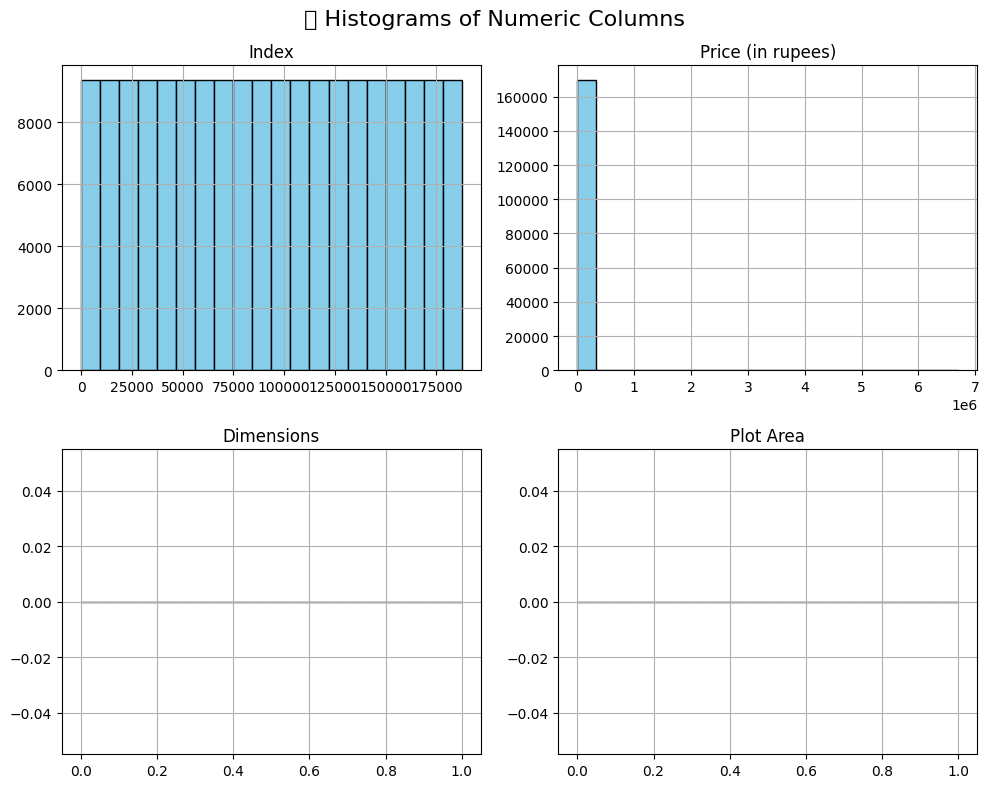

In [95]:
df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


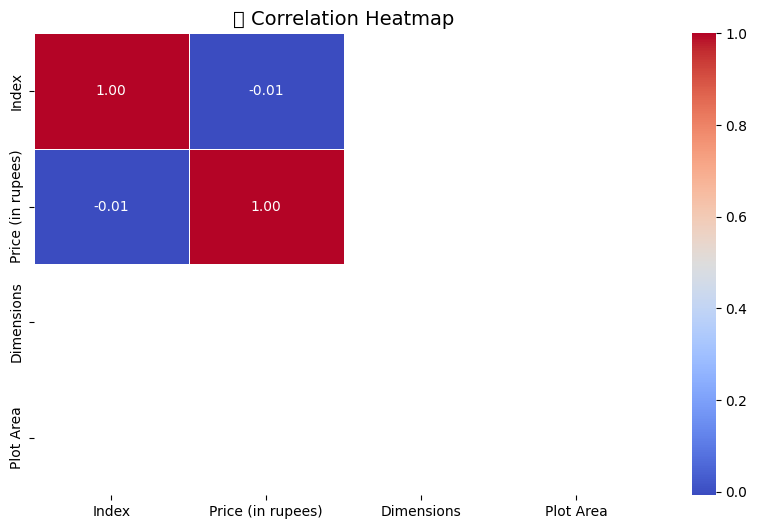

In [96]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("📈 Correlation Heatmap", fontsize=14)
plt.show()
